## Stock Sentiment Analysis using News Headlines

In [1]:
# In this dataset, we have top headlines for specific companies. 
# Based on these headlines there are labels of values zero and one. 
# Zero basically means that stock price will have a negative impact and One means that stock price will have a popositive impact. 
# Top1, Top2…. these are our news headlines.

import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

df = pd.read_csv('./Data.csv', encoding = "ISO-8859-1")
print(f'Total Rows : {len(df.axes[0])}, Columns : {len(df.axes[1])}')
df.head()

Total Rows : 4101, Columns : 27


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [2]:
'''
Data Splitting: The dataset is split into training and testing sets based on the date. 
                This separation ensures the model is trained on older data and tested on newer data.
'''

train = df[df['Date'] < '20150101']
test = df[df['Date'] >= '20150101']

print(f'For Train => Total Rows : {len(train.axes[0])}, Columns : {len(train.axes[1])}')
print(f'For Test => Total Rows : {len(test.axes[0])}, Columns : {len(test.axes[1])}')

'\nData Splitting: The dataset is split into training and testing sets based on the date. \n                This separation ensures the model is trained on older data and tested on newer data.\n'

For Train => Total Rows : 3975, Columns : 27
For Test => Total Rows : 126, Columns : 27


In [3]:
# Data Pre-processing : This section processes the training data by removing punctuation and renaming columns for easier access.

# Removing punctuations
data = train.iloc[:,2:27]
data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)


# Renaming column names for ease of access
list1 = [i for i in range(25)]
new_Index = [str(i) for i in list1]
data.columns = new_Index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,Southgate strikes Leeds pay the penalty,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader German sleaze inquiry,Cheerio boyo,The main recommendations,Has Cubie killed fees,Has Cubie killed fees,Has Cubie killed fees,Hopkins furious at Foster s lack of Hannibal...,Has Cubie killed fees,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man s extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn t know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United s rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne Australia,Necaxa Mexico,Real Madrid Spain,Raja Casablanca Morocco,Corinthians Brazil,Tony s pet project,Al Nassr Saudi Arabia,Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,Auntie back in fashion even if the dress look...,Shoaib appeal goes to the top,Hussain hurt by shambles but lays blame on e...,England s decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for,Christmas glitches,Upending a table Chopping a line and Scoring ...,Scientific evidence unreliable defence claims,Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake up of failing NHS,Lessons of law s hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers are you all whingers,Hollywood Beyond,Ashes and diamonds,Whingers a formidable minority,Alan Parker part two,Thuggery Toxins and Ties,...,Most everywhere UDIs,Most wanted Chloe lunettes,Return of the cane completely off the agenda,From Sleepy Hollow to Greeneland,Blunkett outlines vision for over s,Embattled Dobson attacks play now pay later ...,Doom and the Dome,What is the north south divide,Aitken released from jail,Gone aloft


In [4]:
'''
Lowercasing Headlines: All headlines are converted to lowercase to ensure consistency 
                        (since "Apple" and "apple" would be considered different otherwise).
'''

for index in new_Index:
    data[index]=data[index].str.lower()
data.head(2)

'\nLowercasing Headlines: All headlines are converted to lowercase to ensure consistency \n                        (since "Apple" and "apple" would be considered different otherwise).\n'

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title
1,scorecard,the best lake scene,leader german sleaze inquiry,cheerio boyo,the main recommendations,has cubie killed fees,has cubie killed fees,has cubie killed fees,hopkins furious at foster s lack of hannibal...,has cubie killed fees,...,on the critical list,the timing of their lives,dear doctor,irish court halts ira man s extradition to nor...,burundi peace initiative fades after rebels re...,pe points the way forward to the ecb,campaigners keep up pressure on nazi war crime...,jane ratcliffe,yet more things you wouldn t know without the ...,millennium bug fails to bite


In [5]:
# Combining Headlines: All the headlines for each day are combined into single strings per day, which will later be vectorized for model training.

headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

print(f'Printing All {len(headlines)} collated headlines from testing dataset : \n')
headlines

Printing All 3975 collated headlines from testing dataset : 



['a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title',
 'scorecard the best lake scene leader  german sleaze inquiry cheerio  boyo the main

In [6]:
'''
Feature Extraction and Model Training:
    The CountVectorizer is used to convert the combined headlines into a matrix of token counts, 
    focusing on bigrams (pairs of words). A Random Forest classifier is then trained on this data.
'''

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

# Naive Bayes / Bag of words
countvector = CountVectorizer(ngram_range=(1,1)) # Accept both unigrams (1 word sequence) and bigrams (2 word sequence)
countvector.fit(headlines)
traindataset = countvector.transform(headlines)

#RandomForest Classifier
randomclassifier = RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])


'\nFeature Extraction and Model Training:\n    The CountVectorizer is used to convert the combined headlines into a matrix of token counts, \n    focusing on bigrams (pairs of words). A Random Forest classifier is then trained on this data.\n'

CountVectorizer()

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [7]:
countvector.get_feature_names_out()

array(['aa', 'aaa', 'aaaw', ..., 'zygi', 'zygotic', 'zyklon'],
      dtype=object)

In [8]:
# Printing the testing dataset
test

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
3975,2016-01-04,0,Saudi Arabia breaks off ties with Iran - Amid ...,Exclusive: UK Government urged to reveal its r...,China halts trading as stocks fall 7%,Earthquake measuring 6.8 magnitude strikes India,A virus linked to shrinking newborns brains is...,"New photos of SpaceX booster show sooty, but u...",Indian consulate in Afghanistan under attack b...,Iran calls off Major Hajj,...,Iranian leaders website posts controversial im...,"After Bahrain, Sudan expels Iranian ambassador...",Saudi Arabia to cut off all air traffic with I...,Hezbollah sets off large border bomb targeting...,Iranian diplomats given 48 hours to leave Saud...,BBC News: Migrant crisis: Sweden border checks...,Teachers claim the politics of austerity is le...,The Aftermath of a Muslim Cleric's Execution i...,Iran: 40 arrested for attack on Saudi embassy,"Oil prices jump over 2 pct on Saudi Arabia, Ir..."
3976,2016-01-05,1,"Dutch government backs strong encryption, cond...",ISIS Militants Strap Bomb on 4 Year-Old Boy an...,Canada proceeding with controversial $15-billi...,Brazil is heading for its worst recession sinc...,British ISIS militant's desperate plea for doc...,Malaysia's schools will start holding anti-ISI...,Saudi Arabia omitted from UK death penalty str...,ISIS executes first female journalist. One of ...,...,'Fat cat Tuesday' as top bosses pay overtakes ...,"""The United Nations special rapporteur for hum...",Merkel rejects Bavarian bid for refugee limit:...,Yemen centre for blind 'hit in Saudi coalition...,Mass murderer Anders Behring Breiviks court ca...,Kuwait has recalled its ambassador to Iran in ...,Britain set for first mass strike by doctors i...,First known hacker-caused power outage signals...,Kuwait becomes latest Saudi ally to downgrade ...,'Do Your Cars Emit Oxygen?' Indian Supreme Cou...
3977,2016-01-06,0,China shuts down stock market after 15 min 7% ...,Armed suspect shot dead after trying to storm ...,Oil price falls below $35 a barrel to fresh 11...,Germans outraged by mayors advice for women af...,German public broadcaster ZDF has apologised f...,Iran accuses Saudis of bombing their embassy i...,Protesters demand Canada cancel $15B Saudi con...,"'Snooper's charter' will cost British lives, M...",...,Rio Olympic stadium has no water or electricit...,Saudi-led air strikes in Yemen hit centre for ...,Truck bomb kills 65 at Libyan police training ...,Israeli Tourists on Tour Bus Attacked by Maske...,Israel and China have signed a document of und...,Donald Trump threatens to pull 700m investment...,Israel busts Hamas terror cell planning abduct...,A working hospital in central China was demoli...,Paris to close Champs Elysees to cars one Sund...,TransCanada Corp files US$15-billion lawsuit a...
3978,2016-01-07,0,Reports of sexual assaults on women across Eur...,Shelter forcibly converted children to Christi...,Iran Has Banned Its Citizens from Making Pilgr...,Gaddafi warned Blair his ousting would 'open d...,A Turkish firm has been selling fake life vest...,German minister says deportations possible in ...,Mao statue in China 'pulled down by authoritie...,A poacher-hunting dog in South Africa has been...,...,Charlie Hebdo anniversary: free-speech groups ...,Polish president signs bill putting state medi...,Mein Kampf hits stores in tense Germany,"Morocco Bans WhatsApp, Skype, Viber and Other ...",The UN library announced its most-checked-out ...,One third of the worlds freshwater fish are at...,"Nuclear weapons risk greater than in cold war,...","North Korea Claims That It Tested the ""H-Bomb ...",UK - DWP told woman she was not ill enough for...,Venezuela's new parliament removes pictures of...
3979,2016-01-08,0,El Chapo' Being Taken to Same Prison He Escape...,El Chapo has been caught,At least 231 children abused at Catholic boys ...,North Korea has defended its latest nuclear te...,A group of United Nations' experts

In [9]:
# Accessing all columns of the row labeled 3723 in the DataFrame test.
test.loc[3975,:]

Date                                            2016-01-04
Label                                                    0
Top1     Saudi Arabia breaks off ties with Iran - Amid ...
Top2     Exclusive: UK Government urged to reveal its r...
Top3                 China halts trading as stocks fall 7%
Top4      Earthquake measuring 6.8 magnitude strikes India
Top5     A virus linked to shrinking newborns brains is...
Top6     New photos of SpaceX booster show sooty, but u...
Top7     Indian consulate in Afghanistan under attack b...
Top8                             Iran calls off Major Hajj
Top9     Denmark responds to Swedish border checks with...
Top10    David Cameron criticised for turning 'blind ey...
Top11    Denmark introduces temporary controls along Ge...
Top12    Israel Retaliates to Hezbollah bombing at Leba...
Top13    China Aims to Build 40 Nuclear Power Plants in...
Top14    According to obtained documents, after rape an...
Top15    Western Australian rooftop solar systems produ.

In [10]:
# Model Prediction: The test data is similarly transformed and then used for making predictions with the trained model.

'''
Define a list to store all the headlines for each row in the test dataset after transformation.
Initialize a loop to iterate through all the rows in the test dataset.
For each row in the test dataset, transform the row into a string and append it to the list.
    -> For each row, select the data from the 3rd column (index 2) to the 27th column (index 26).
    -> Convert each value to a string and joins them into a single string with spaces in between.
    -> Append this string to the test_transform list. 
    -> The iloc function is used to select rows and columns by integer index.
    -> This is done to ensure that the test data is in the same format as the training data.
Transform the test dataset using the CountVectorizer to convert the headlines into a matrix of token counts.
Use the trained model to make predictions on the test dataset.

'''
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
    
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)
print(predictions)

train['headlines'] = headlines
train_headlines = headlines

test_headlines = test_transform

'\nDefine a list to store all the headlines for each row in the test dataset after transformation.\nInitialize a loop to iterate through all the rows in the test dataset.\nFor each row in the test dataset, transform the row into a string and append it to the list.\n    -> For each row, select the data from the 3rd column (index 2) to the 27th column (index 26).\n    -> Convert each value to a string and joins them into a single string with spaces in between.\n    -> Append this string to the test_transform list. \n    -> The iloc function is used to select rows and columns by integer index.\n    -> This is done to ensure that the test data is in the same format as the training data.\nTransform the test dataset using the CountVectorizer to convert the headlines into a matrix of token counts.\nUse the trained model to make predictions on the test dataset.\n\n'

[0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1]


/var/folders/_g/32gphw6s11v384s81xcr_kpm0000gn/T/ipykernel_22989/580180769.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['headlines'] = headlines


In [11]:
# import nltk
# nltk.download('stopwords')

# corpus : collection of text documents, often stored in a directory with other text file directories

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

ps = PorterStemmer()
train_corpus = []

'''
For each headline in the training set:
  -> Tokenize the headlines from training set 
  -> Remove the stopwords from the tokens 
  -> Reduce each token to it's stem/root word 
  -> Join the reduced tokens to form a headline
  -> Append the headline to the training corpus
'''
for i in range(0, len(train_headlines)):
  words = train_headlines[i].split()
  words = [word for word in words if word not in set(stopwords.words('english'))]
  words = [ps.stem(word) for word in words]
  headline = ' '.join(words)
  train_corpus.append(headline)

"\nFor each headline in the training set:\n  -> Tokenize the headlines from training set \n  -> Remove the stopwords from the tokens \n  -> Reduce each token to it's stem/root word \n  -> Join the reduced tokens to form a headline\n  -> Append the headline to the training corpus\n"

In [12]:
test_corpus = []

'''
For each headline in the testing set:
  -> Tokenize the headlines from training set 
  -> Remove the stopwords from the tokens 
  -> Reduce each token to it's stem/root word 
  -> Join the reduced tokens to form a headline
  -> Append the headline to the training corpus
'''
for i in range(0, len(test_headlines)):
  words = test_headlines[i].split()
  words = [word for word in words if word not in set(stopwords.words('english'))]
  words = [ps.stem(word) for word in words]
  headline = ' '.join(words)
  test_corpus.append(headline)

"\nFor each headline in the testing set:\n  -> Tokenize the headlines from training set \n  -> Remove the stopwords from the tokens \n  -> Reduce each token to it's stem/root word \n  -> Join the reduced tokens to form a headline\n  -> Append the headline to the training corpus\n"

In [13]:
'''
Word Grouping by Sentiment:
    It separates words by sentiment labels (0 or 1) from the training data to analyze word frequency by sentiment.
'''

down_words = []
for i in list(train['Label'][train['Label']==0].index):
  down_words.append(train_corpus[i])

up_words = []
for i in list(train['Label'][train['Label']==1].index):
  up_words.append(train_corpus[i])

'\nWord Grouping by Sentiment:\n    It separates words by sentiment labels (0 or 1) from the training data to analyze word frequency by sentiment.\n'

'\nWord Cloud Visualization:\n    Word clouds are generated for both positive and negative sentiment headlines, \n    providing a visual representation of the most common words associated with each sentiment.\n'

<Figure size 800x800 with 0 Axes>

(-0.5, 2999.5, 2499.5, -0.5)

Text(0.5, 1.0, 'Indicating fall in Stock ')

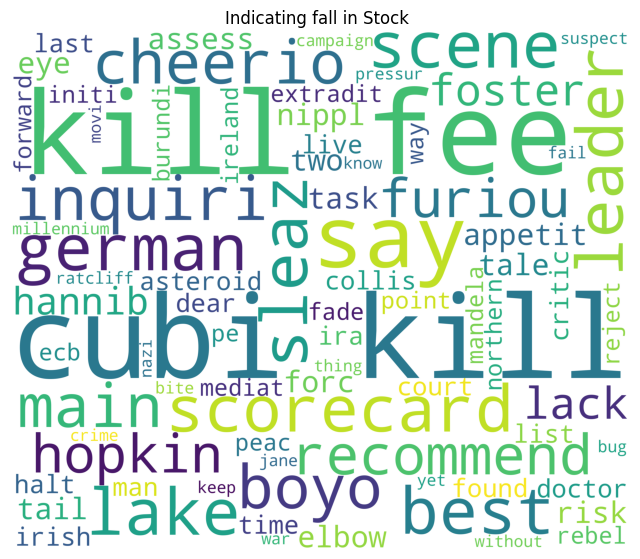

In [14]:
'''
Word Cloud Visualization:
    Word clouds are generated for both positive and negative sentiment headlines, 
    providing a visual representation of the most common words associated with each sentiment.
'''

from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Positive sentiment headlines
wordcloud_neg = WordCloud(background_color='white', width=3000, height=2500).generate(down_words[1])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud_neg)
plt.axis('off')
plt.title("Indicating fall in Stock ")
plt.show()

<Figure size 800x800 with 0 Axes>

(-0.5, 2999.5, 2499.5, -0.5)

Text(0.5, 1.0, 'Indicating rise in Stock ')

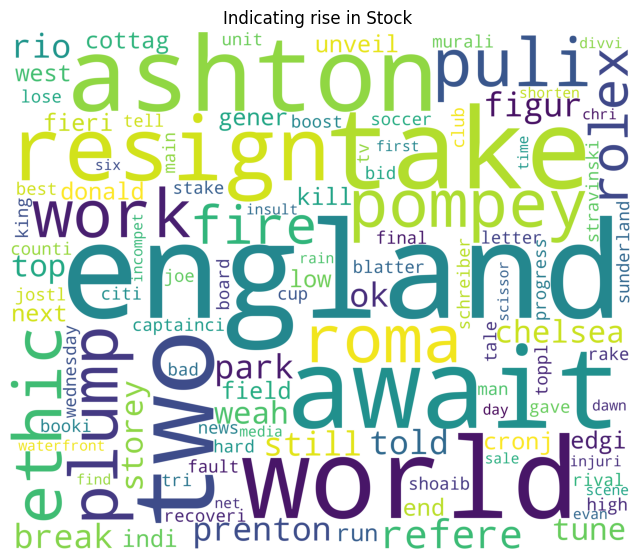

In [15]:
# Negative sentiment headlines
wordcloud_pos = WordCloud(background_color='white', width=3000, height=2500).generate(up_words[5])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud_pos)
plt.axis('off')
plt.title("Indicating rise in Stock ")
plt.show()

'\nModel Evaluation:\n    The performance of the model is evaluated using accuracy score, confusion matrix, and a detailed classification report.\n'

<Axes: >

Text(0.5, 23.52222222222222, 'Predicted')

Text(50.722222222222214, 0.5, 'Actual')

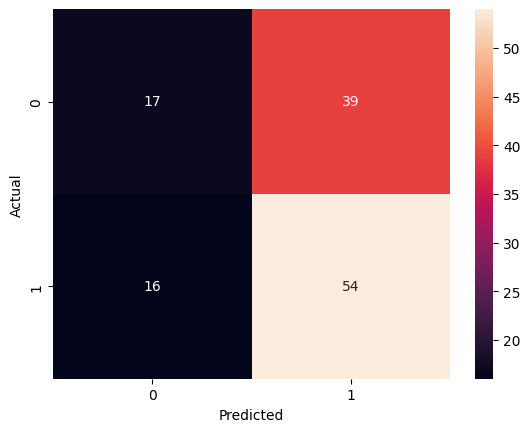

0.5634920634920635
              precision    recall  f1-score   support

           0       0.52      0.30      0.38        56
           1       0.58      0.77      0.66        70

    accuracy                           0.56       126
   macro avg       0.55      0.54      0.52       126
weighted avg       0.55      0.56      0.54       126



In [17]:
'''
Model Evaluation:
    The performance of the model is evaluated using accuracy score, confusion matrix, and a detailed classification report.
'''

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


cm = confusion_matrix(test['Label'],predictions)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

score = accuracy_score(test['Label'],predictions)
print(score)

report = classification_report(test['Label'],predictions)
print(report)